In [6]:
import seaborn as sns
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
data = pd.read_csv('D:\\MachineLearning\\Project\\LaptopPricePrediction\\notebook\\data\\laptop_price.csv  ' ,encoding="latin-1")
      

In [8]:
data.sample(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
128,131,Dell,Inspiron 5770,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.8kg,1396.00
288,293,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.5kg,1179.00
705,713,Dell,Vostro 5568,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.18kg,795.00
766,775,Asus,X751NV-TY001 (N4200/4GB/1TB/GeForce,Notebook,17.3,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.8kg,470.34
695,703,Acer,TravelMate B117-M,Netbook,11.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics,Windows 10,1.4kg,269.00


# EDA


In [9]:
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [10]:
data.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

No null values are present in dataset so we dont need to handle them separatly

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


Lot of column are with datatype object we will handle them

In [12]:
data_column =data.columns
data_column

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [13]:
data.drop(columns=['laptop_ID' ,'Product'] ,inplace=True)

In [14]:
# convert in to int and remove GB and KG from features
data['Ram'] = data['Ram'].apply(lambda x : x.replace('GB' ,"")).astype('int')
data['Weight'] = data['Weight'].apply(lambda x : x.replace("kg" ,"")).astype('float')

In [15]:
num_column = data.select_dtypes(exclude='object').columns
cat_column =data.select_dtypes(include='object').columns
cat_column

Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu',
       'OpSys'],
      dtype='object')

In [16]:
for name in cat_column:
    print(name)
    print(data[name].unique())
 
    print(data[name].nunique())
    print("*" *35)

Company
['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
19
***********************************
TypeName
['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
6
***********************************
ScreenResolution
['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'IPS Panel Touchscreen 1920x1200' 'Touchscreen 2256x1504'
 'Quad HD+ / Touchscreen 3200x1800' 'IPS Panel 1366x768'
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'
 'IPS Panel Full HD 2160x1440' '4K Ultra HD / Touchscreen 3840x2160'
 'Touchscreen 2560x1440' '1600x900' 'IPS Panel 4K Ultra HD 3840x2160'
 '4K Ultra HD 3840x2160' 'Touchscreen 1366x

In [17]:
Company = data.groupby(by='Company')['Price_euros'].agg('mean').sort_values(ascending=False).reset_index()
Company.head()

,Company,Price_euros
0,Razer,3346.142857
1,LG,2099.000000
2,MSI,1728.908148
3,Google,1677.666667
4,Microsoft,1612.308333


Text(0.5, 1.0, 'Price vs Company')

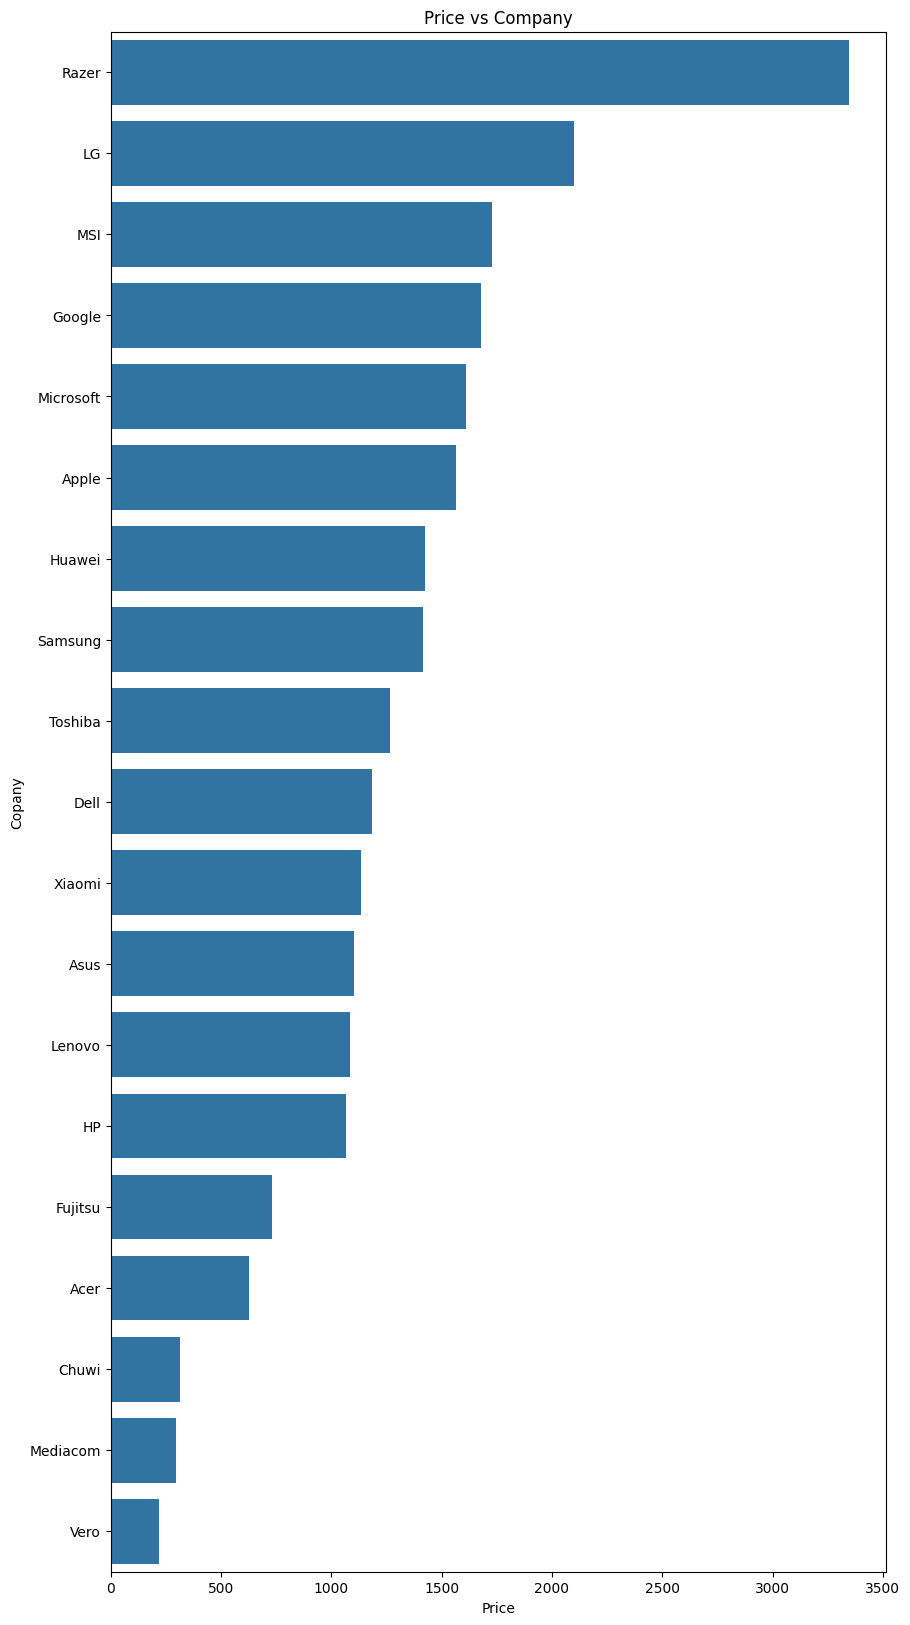

In [18]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,20))
sns.barplot(x='Price_euros' , y='Company' ,data=Company)
plt.xlabel('Price')
plt.ylabel('Copany')
plt.title('Price vs Company')

In [19]:
data['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [20]:
Type_name  = data.groupby('TypeName')['Price_euros'].agg('mean').sort_values(ascending=False).reset_index()
Type_name

,TypeName,Price_euros
0,Workstation,2280.358966
1,Gaming,1731.380634
2,Ultrabook,1548.230357
3,2 in 1 Convertible,1282.401653
4,Notebook,782.078624
5,Netbook,636.232000


<Axes: xlabel='TypeName', ylabel='Price_euros'>

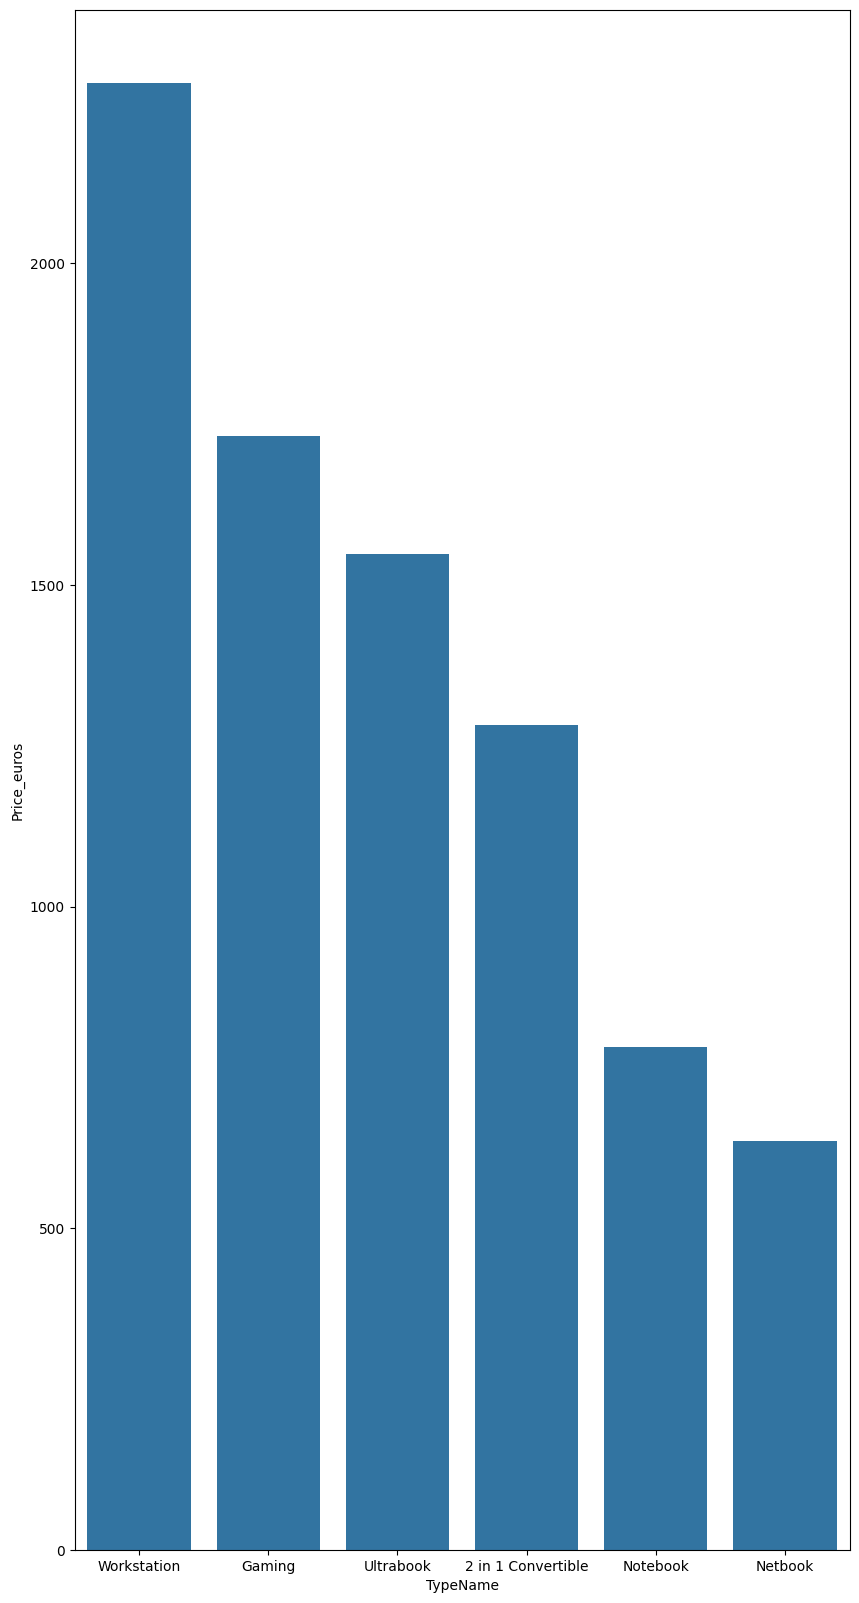

In [21]:
plt.figure(figsize=(10,20))
sns.barplot(x='TypeName' , y='Price_euros' ,data = Type_name)

In [22]:
def check_touchscreen(x):
    if 'Touchscreen' in x:
        return 1
    else:
        return 0
    
data['Touchscreen'] = data['ScreenResolution'].apply(check_touchscreen)

<Axes: xlabel='Touchscreen', ylabel='count'>

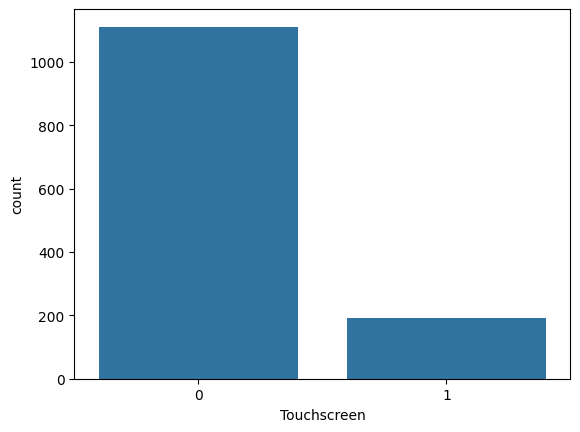

In [23]:
sns.countplot(data= data ,x='Touchscreen')

In [24]:
Touchscreen = data.groupby('Touchscreen')['Price_euros'].agg('mean').sort_values(ascending=True).reset_index()
Touchscreen

,Touchscreen,Price_euros
0,0,1068.140369
1,1,1445.105208


<Axes: xlabel='Touchscreen', ylabel='Price_euros'>

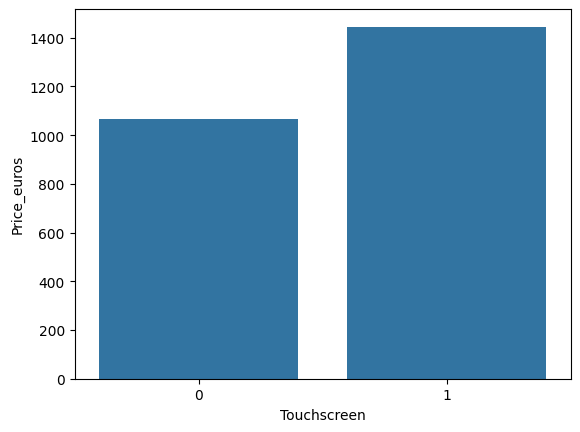

In [25]:
sns.barplot(x='Touchscreen' , y='Price_euros' ,data=Touchscreen)

In [26]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0


In [27]:
# creating a function to fatch wether laptop ipspanel or not
def ipspanel(x):
    if "IPS" in x:
        return 1
    else:
        return 0
data["IPS_panel"] = data["ScreenResolution"].apply(ipspanel)

<Axes: title={'center': 'IPS_panel VS Price'}, xlabel='IPS_panel', ylabel='Price_euros'>

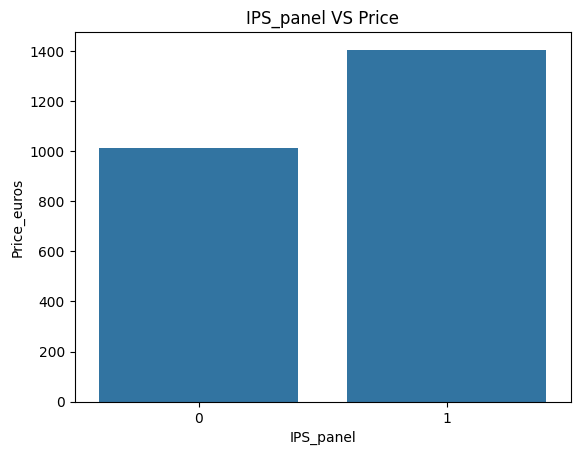

In [28]:
IPS_panel = data.groupby("IPS_panel")["Price_euros"].mean().sort_values(ascending=False).reset_index()
plt.title("IPS_panel VS Price")
sns.barplot(x="IPS_panel",y="Price_euros",data = IPS_panel)

In [29]:
new = data['ScreenResolution'].str.split('x' ,expand=True ,n=1)
X_resolution = new[0].str.split().str[-1]
Y_resolution =new[1]

data['X_resolution'] =X_resolution
data['Y_resolution'] = Y_resolution

In [30]:
# this function will fatch the requiret pricessor
def processor(x):
    if x.split()[0]=='Intel' :
        if 'Intel Core i5' in x:
            return 'Intel Core i5'
        elif 'Intel Core i3' in x:
            return 'Intel Core i3'
        elif 'Intel Core i7' in x:
            return 'Intel Core i7'
        else:
            return 'Other Intel'
    else:
        return 'AMD processor'
    

In [31]:
data["Cpu_brand"] = data["Cpu"].apply(processor)

In [32]:
Cpu_brand = data.groupby('Cpu_brand')['Price_euros'].agg('mean').sort_values(ascending=False).reset_index()
Cpu_brand

,Cpu_brand,Price_euros
0,Intel Core i7,1595.779108
1,Intel Core i5,1015.015248
2,AMD processor,562.200159
3,Other Intel,550.372532
4,Intel Core i3,541.625956


<Axes: xlabel='Cpu_brand', ylabel='Price_euros'>

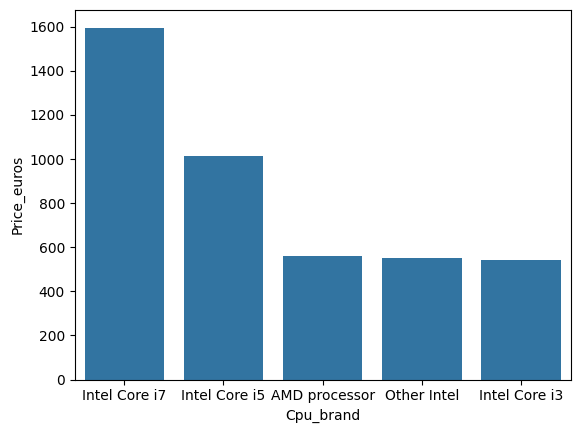

In [33]:
sns.barplot(x='Cpu_brand' ,y='Price_euros' ,data=Cpu_brand)

In [34]:
data.drop(columns=['Cpu'] ,inplace=True)

<Axes: title={'center': 'Ram VS Price'}, xlabel='Ram', ylabel='Price_euros'>

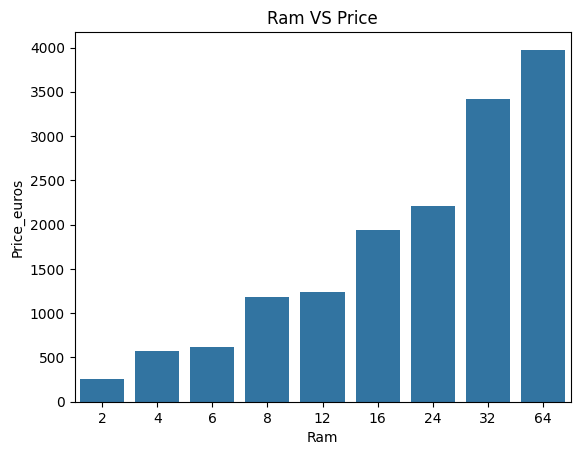

In [35]:
Ram = data.groupby("Ram")["Price_euros"].mean().sort_values(ascending=False).reset_index()
plt.title("Ram VS Price")
sns.barplot(x="Ram",y="Price_euros",data = Ram)

In [36]:
data.sample()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS_panel,X_resolution,Y_resolution,Cpu_brand
718,Mediacom,Notebook,14.0,IPS Panel Full HD 1920x1200,4,32GB HDD,Intel HD Graphics 400,Windows 10,1.4,265.0,0,1,1920,1200,Other Intel


In [37]:
data['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [38]:
data['Memory'] = data['Memory'].str.replace('\.0' ,'' ,regex=True)
data['Memory'] = data['Memory'].str.replace('GB' ,"")
data['Memory'] = data['Memory'].str.replace('TB' ,'000')
new = data['Memory'].str.split('+' ,expand=True)


In [39]:
data['First'] = new[0]
data['Second'] = new[1]
data['First'] =data['First'].str.strip()

In [40]:
data['First'].unique()

array(['128 SSD', '128 Flash Storage', '256 SSD', '512 SSD', '500 HDD',
       '256 Flash Storage', '1000 HDD', '32 Flash Storage',
       '64 Flash Storage', '32 SSD', '2000 HDD', '64 SSD', '1000 Hybrid',
       '1000 SSD', '16 SSD', '16 Flash Storage', '180 SSD', '32 HDD',
       '512 Flash Storage', '128 HDD', '240 SSD', '8 SSD', '508 Hybrid'],
      dtype=object)

In [41]:
def Storage_SSD(x):
    if 'SSD' in x:
        return 1 
    else:
        return 0

data['Layer1SSD'] = data['First'].apply(Storage_SSD)

def Storage_HDD(x):
    if 'HDD' in x:
        return 1 
    else:
        return 0

data['Layer1HDD'] = data['First'].apply(Storage_HDD)

def Storage_Flash_Storage(x):
    if 'Flash Storage' in x:
        return 1 
    else:
        return 0

data['Layer1Flash'] = data['First'].apply(Storage_Flash_Storage)

def flashstorage(x):
    if "Flash Storage" in x:
        return 1
    else:
        return 0
data['Layer1Flash'] = data['First'].apply(Storage_Flash_Storage)

def hybrid(x):
    if "Hybrid" in x:
        return 1
    else:
        return 0
data['Layer1Hybrid'] = data['First'].apply(hybrid)



In [42]:
data['Second'].unique()

array([None, '  1000 HDD', '  256 SSD', '  2000 HDD', '  500 HDD',
       '  512 SSD', '  1000 Hybrid'], dtype=object)

In [43]:
data['Second'].fillna('0' ,inplace=True)
def Storage_SSD(x):
    if 'SSD' in x:
        return 1 
    else:
        return 0

data['Layer2SSD'] = data['Second'].apply(Storage_SSD)

def Storage_HDD(x):
    if 'HDD' in x:
        return 1 
    else:
        return 0

data['Layer2HDD'] = data['Second'].apply(Storage_HDD)

def Storage_Flash_Storage(x):
    if 'Flash Storage' in x:
        return 1 
    else:
        return 0
data['Layer2Flash'] = data['Second'].apply(Storage_Flash_Storage)


   
def flashstorage(x):
    if "Flash Storage" in x:
        return 1
    else:
        return 0
data["Layer2FlashStorage"] = data["Second"].apply(flashstorage)

def hybrid(x):
    if "Hybrid" in x:
        return 1
    else:
        return 0
data['Layer2Hybrid'] = data['Second'].apply(hybrid)


C:\Users\PRAMOD KHAVARE\AppData\Local\Temp\ipykernel_25796\3206090386.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Second'].fillna('0' ,inplace=True)


In [44]:
data['First'] = data['First'].str.replace(r'\D' ,'' ,regex=True).astype('int')

data['Second'] = data['Second'].str.replace(r'\D' ,'' ,regex=True).astype('int')

In [45]:
data['SSD'] = data['Layer1SSD']*data['First'] +data['Layer1SSD']*data['Second']
data['HDD'] = data['Layer1HDD']*data['First']+data['Layer2HDD']*data['Second']
data['FlashStorage'] = data['Layer1Flash']*data['First'] + data['Layer2Flash']*data['Second']

In [46]:
data['ScreenResolution'].str.split('x')[0][0]

'IPS Panel Retina Display 2560'

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1303 non-null   object 
 1   TypeName            1303 non-null   object 
 2   Inches              1303 non-null   float64
 3   ScreenResolution    1303 non-null   object 
 4   Ram                 1303 non-null   int32  
 5   Memory              1303 non-null   object 
 6   Gpu                 1303 non-null   object 
 7   OpSys               1303 non-null   object 
 8   Weight              1303 non-null   float64
 9   Price_euros         1303 non-null   float64
 10  Touchscreen         1303 non-null   int64  
 11  IPS_panel           1303 non-null   int64  
 12  X_resolution        1303 non-null   object 
 13  Y_resolution        1303 non-null   object 
 14  Cpu_brand           1303 non-null   object 
 15  First               1303 non-null   int32  
 16  Second

In [48]:

data['First']=data['First'].astype('int')
data['Second']=data['Second'].astype('int')

In [49]:
data.head(1)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,Layer1Flash,Layer1Hybrid,Layer2SSD,Layer2HDD,Layer2Flash,Layer2FlashStorage,Layer2Hybrid,SSD,HDD,FlashStorage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,...,0,0,0,0,0,0,0,128,0,0


In [50]:

data["ScreenResolution"] = data["ScreenResolution"].str.replace(",","").str.findall(r"(\d+\.?\d+)").apply(lambda x:"x".join(x))
new = data["ScreenResolution"].str.split("x",n=1,expand=True)
data["X_resolution"] = new[0]


In [51]:

data["ScreenResolution"] = data["ScreenResolution"].str.replace(",","").str.findall(r"(\d+\.?\d+)").apply(lambda x:"x".join(x))
# split the data and fatch the resolution
new = data["ScreenResolution"].str.split("x",n=1,expand=True)
# # use findall functioon to fatch only numeric values and convert in to int
# data["X_resolution"] = new[0]
# data["Y_resolution"] = new[1]
# data["X_resolution"] = data["X_resolution"].str.replace(",","").str.findall(r"(\d+\.?\d+)").apply(lambda x:x[0])
# data["X_resolution"] = data["X_resolution"].astype(int)
# data["Y_resolution"] = data["Y_resolution"].astype(int)
# # ppi is the combination of three columns x,y and inches      "Inches" "ScreenResolution"
# # data["PPI"] = (((data["X_resolution"]**2) + (data["Y_resolution"]**2))**0.5/data["Inches"]).astype(float)
# data.drop(["Inches","Y_resolution","X_resolution","ScreenResolution"],axis=1,inplace=True)

In [52]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,Layer1Flash,Layer1Hybrid,Layer2SSD,Layer2HDD,Layer2Flash,Layer2FlashStorage,Layer2Hybrid,SSD,HDD,FlashStorage
0,Apple,Ultrabook,13.3,2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,...,1,0,0,0,0,0,0,0,0,128
2,HP,Notebook,15.6,1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,15.4,2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,13.3,2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,...,0,0,0,0,0,0,0,256,0,0


In [53]:
data.drop(columns=['First' ,'Second' ,'Layer1SSD', 'Layer1HDD', 'Layer1Flash', 'Layer2SSD', 'Layer2HDD', 'Layer2Flash', 'Layer2FlashStorage' ])

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS_panel,X_resolution,Y_resolution,Cpu_brand,Layer1Hybrid,Layer2Hybrid,SSD,HDD,FlashStorage
0,Apple,Ultrabook,13.3,2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,Intel Core i5,0,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,Intel Core i5,0,0,0,0,128
2,HP,Notebook,15.6,1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,Intel Core i5,0,0,256,0,0
3,Apple,Ultrabook,15.4,2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,Intel Core i7,0,0,512,0,0
4,Apple,Ultrabook,13.3,2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,Intel Core i5,0,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,1920x1080,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1,1,1920,1080,Intel Core i7,0,0,128,0,0
1299,Lenovo,2 in 1 Convertible,13.3,3200x1800,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1,1,3200,1800,Intel Core i7,0,0,512,0,0
1300,Lenovo,Notebook,14.0,1366x768,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,0,0,1366,768,Other Intel,0,0,0,0,64
1301,HP,Notebook,15.6,1366x768,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,0,0,1366,768,Intel Core i7,0,0,0,1000,0


In [54]:
data['Gpu_brand'] = data['Gpu'].str.split(expand=True)[0]

In [55]:
data['OpSys'] = data['OpSys'].str.replace('OS' ,'').str.capitalize()
data['OpSys'] = data['OpSys'].str.replace(' 10' ,'').str.capitalize()
data['OpSys'] = data['OpSys'].str.replace('  x' ,'').str.capitalize()
data['OpSys'] = data['OpSys'].str.replace(' s' ,'').str.capitalize()
data['OpSys'] = data['OpSys'].str.replace(' 7' ,'').str.capitalize()

In [56]:
data['OpSys'].unique()

array(['Mac', 'No ', 'Windows', 'Linux', 'Android', 'Chrome '],
      dtype=object)

In [57]:
data.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Ram', 'Memory',
       'Gpu', 'OpSys', 'Weight', 'Price_euros', 'Touchscreen', 'IPS_panel',
       'X_resolution', 'Y_resolution', 'Cpu_brand', 'First', 'Second',
       'Layer1SSD', 'Layer1HDD', 'Layer1Flash', 'Layer1Hybrid', 'Layer2SSD',
       'Layer2HDD', 'Layer2Flash', 'Layer2FlashStorage', 'Layer2Hybrid', 'SSD',
       'HDD', 'FlashStorage', 'Gpu_brand'],
      dtype='object')

In [58]:
data.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Ram', 'Memory',
       'Gpu', 'OpSys', 'Weight', 'Price_euros', 'Touchscreen', 'IPS_panel',
       'X_resolution', 'Y_resolution', 'Cpu_brand', 'First', 'Second',
       'Layer1SSD', 'Layer1HDD', 'Layer1Flash', 'Layer1Hybrid', 'Layer2SSD',
       'Layer2HDD', 'Layer2Flash', 'Layer2FlashStorage', 'Layer2Hybrid', 'SSD',
       'HDD', 'FlashStorage', 'Gpu_brand'],
      dtype='object')

In [59]:
data.drop(columns=['Memory' ,'Gpu' ,'First' 
                   ,'Second' ,'Layer1SSD', 'Layer1HDD', 'Layer1Flash', 'Layer1Hybrid' ,
                   'Layer2SSD', 'Layer2HDD', 'Layer2Flash', 'Layer2FlashStorage', 'Layer2Hybrid'
                   ] ,inplace=True)

In [60]:
data

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price_euros,Touchscreen,IPS_panel,X_resolution,Y_resolution,Cpu_brand,SSD,HDD,FlashStorage,Gpu_brand
0,Apple,Ultrabook,13.3,2560x1600,8,Mac,1.37,1339.69,0,1,2560,1600,Intel Core i5,128,0,0,Intel
1,Apple,Ultrabook,13.3,1440x900,8,Mac,1.34,898.94,0,0,1440,900,Intel Core i5,0,0,128,Intel
2,HP,Notebook,15.6,1920x1080,8,No,1.86,575.00,0,0,1920,1080,Intel Core i5,256,0,0,Intel
3,Apple,Ultrabook,15.4,2880x1800,16,Mac,1.83,2537.45,0,1,2880,1800,Intel Core i7,512,0,0,AMD
4,Apple,Ultrabook,13.3,2560x1600,8,Mac,1.37,1803.60,0,1,2560,1600,Intel Core i5,256,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,1920x1080,4,Windows,1.80,638.00,1,1,1920,1080,Intel Core i7,128,0,0,Intel
1299,Lenovo,2 in 1 Convertible,13.3,3200x1800,16,Windows,1.30,1499.00,1,1,3200,1800,Intel Core i7,512,0,0,Intel
1300,Lenovo,Notebook,14.0,1366x768,2,Windows,1.50,229.00,0,0,1366,768,Other Intel,0,0,64,Intel
1301,HP,Notebook,15.6,1366x768,6,Windows,2.19,764.00,0,0,1366,768,Intel Core i7,0,1000,0,AMD


In [61]:
categorical_feature = data.select_dtypes(include='object').columns.to_list()
numerical_feature = data.select_dtypes(exclude='object').columns.to_list()


C:\Users\PRAMOD KHAVARE\AppData\Local\Temp\ipykernel_25796\2976591606.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data[numerical_feature[i]])
C:\Users\PRAMOD KHAVARE\AppData\Local\Temp\ipykernel_25796\2976591606.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data[numerical_featu

C:\Users\PRAMOD KHAVARE\AppData\Local\Temp\ipykernel_25796\2976591606.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data[numerical_feature[i]])
C:\Users\PRAMOD KHAVARE\AppData\Local\Temp\ipykernel_25796\2976591606.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data[numerical_featu

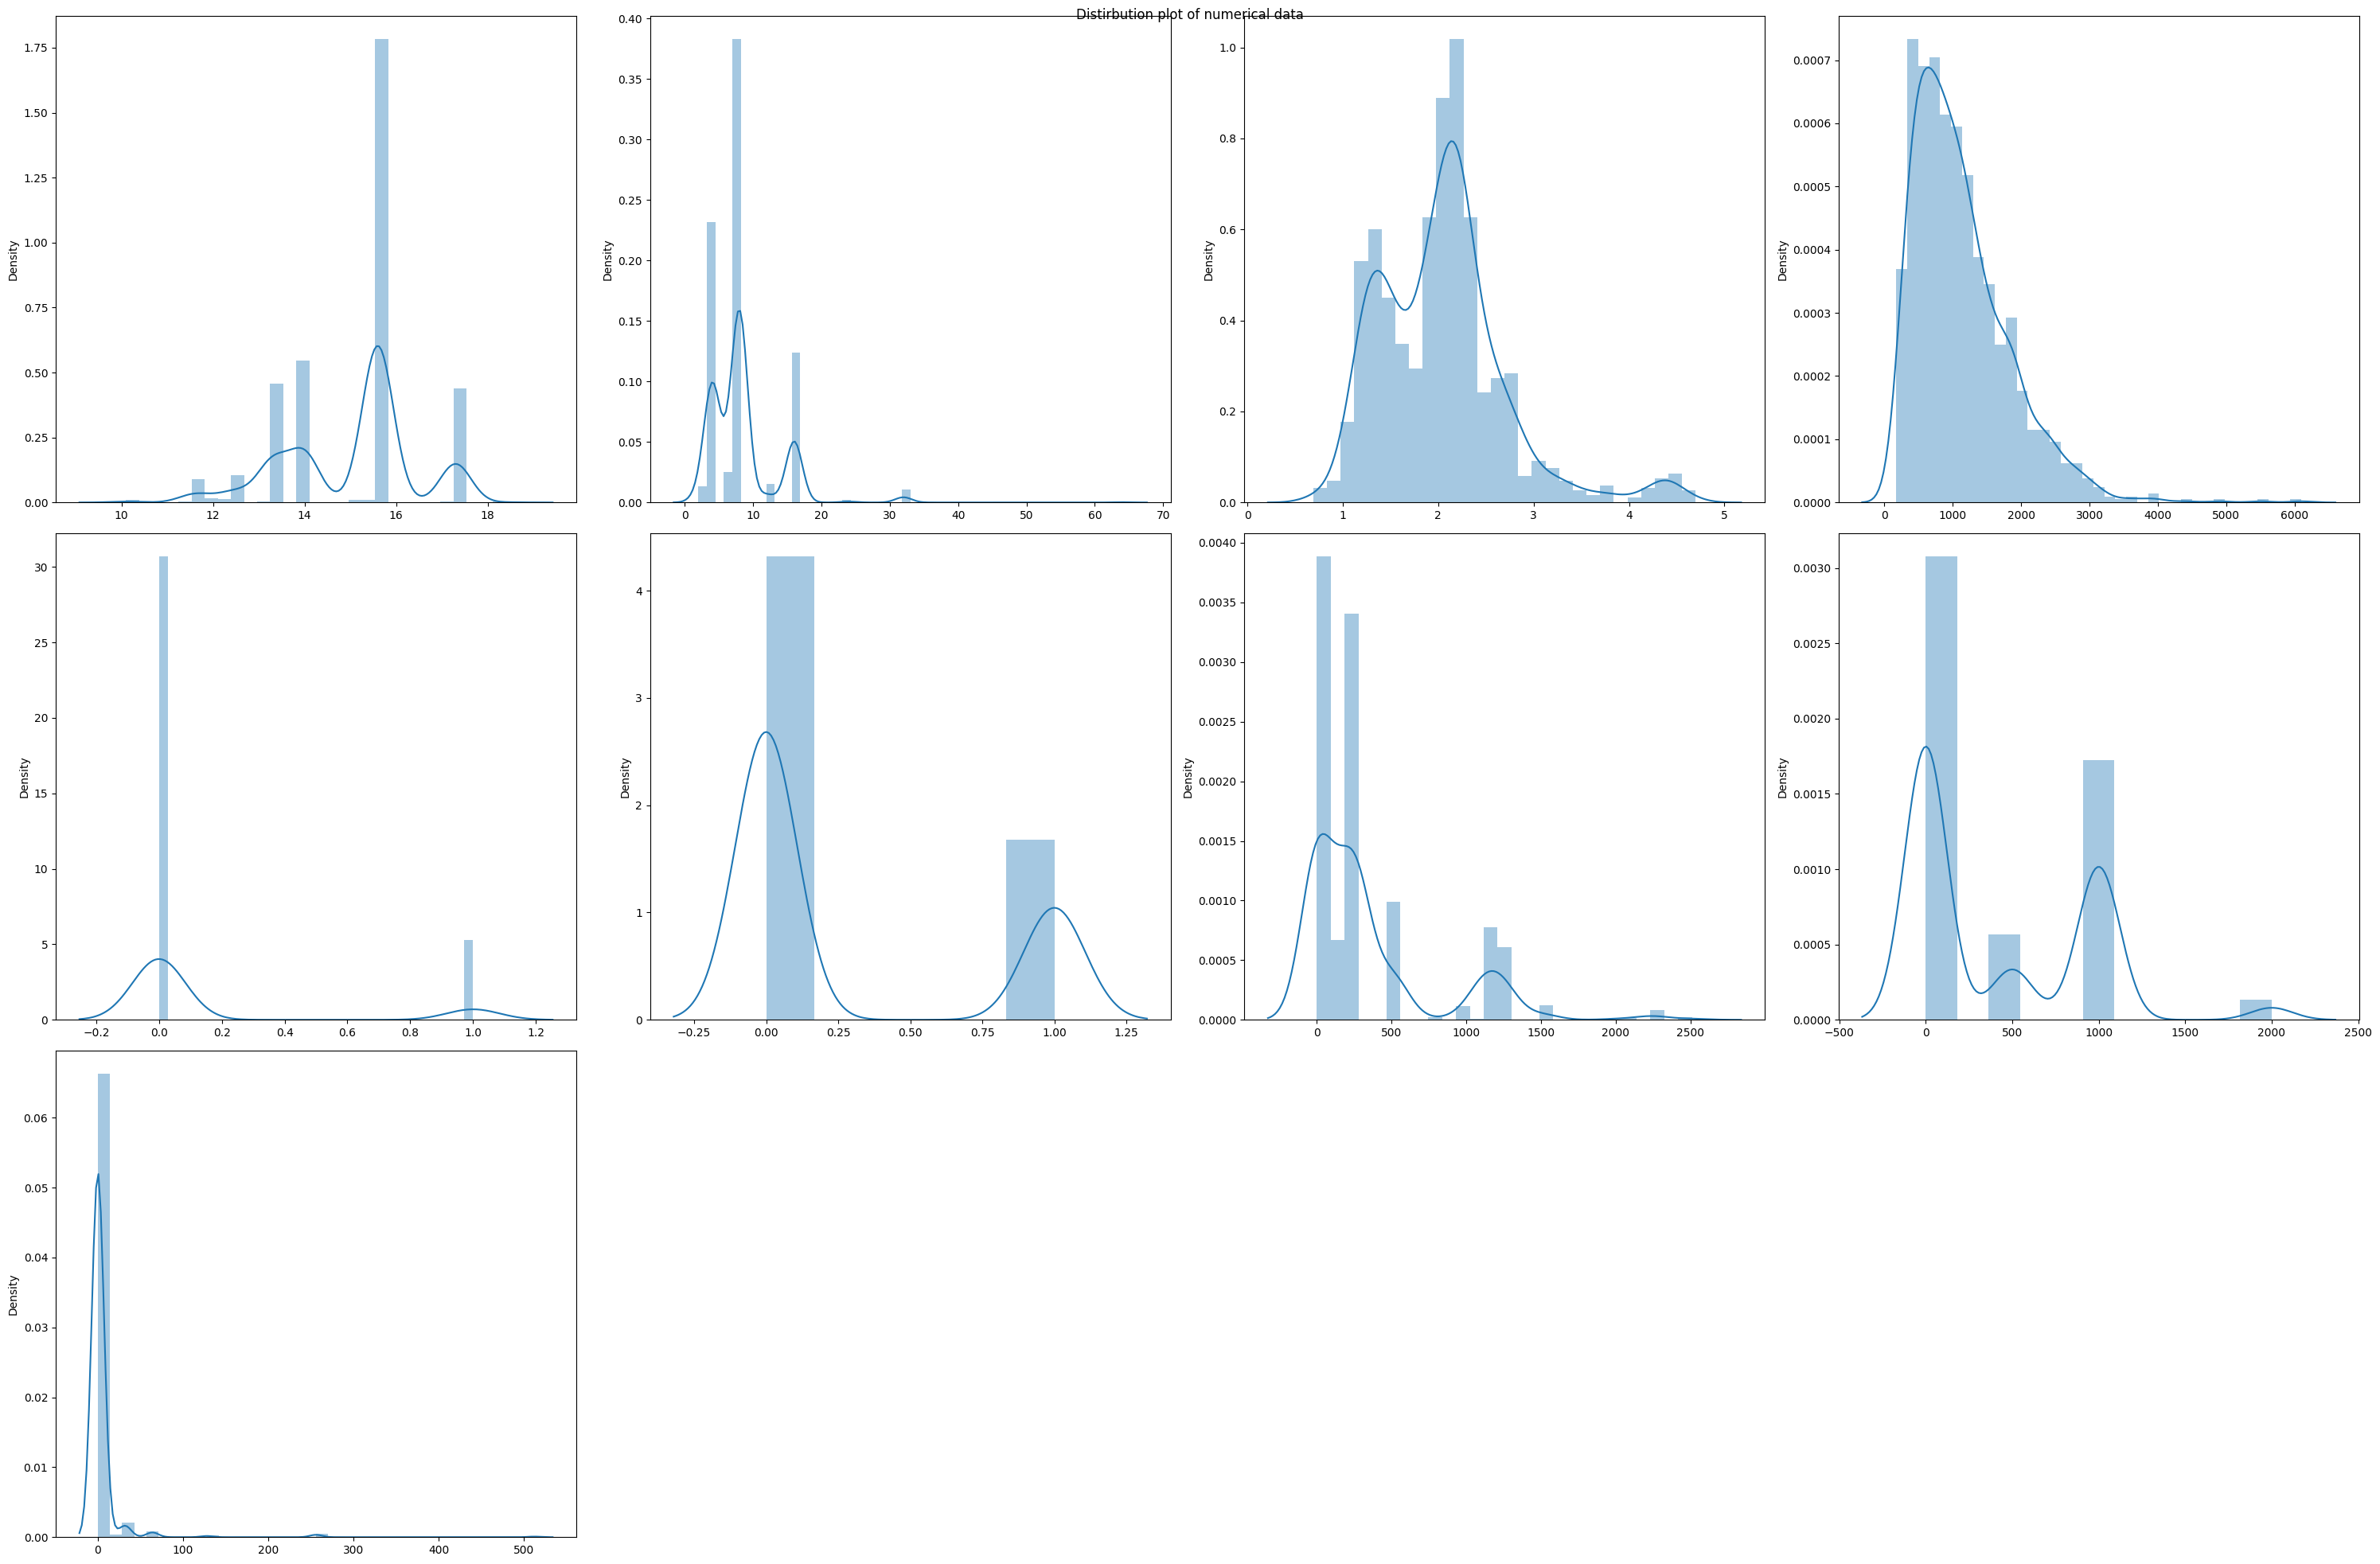

In [62]:

plt.figure(figsize=(30,20))
try:
    plt.suptitle("Distirbution plot of numerical data")
    for i in range(0,len(numerical_feature)):
        plt.subplot(3,4,i+1)
        sns.distplot(x=data[numerical_feature[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

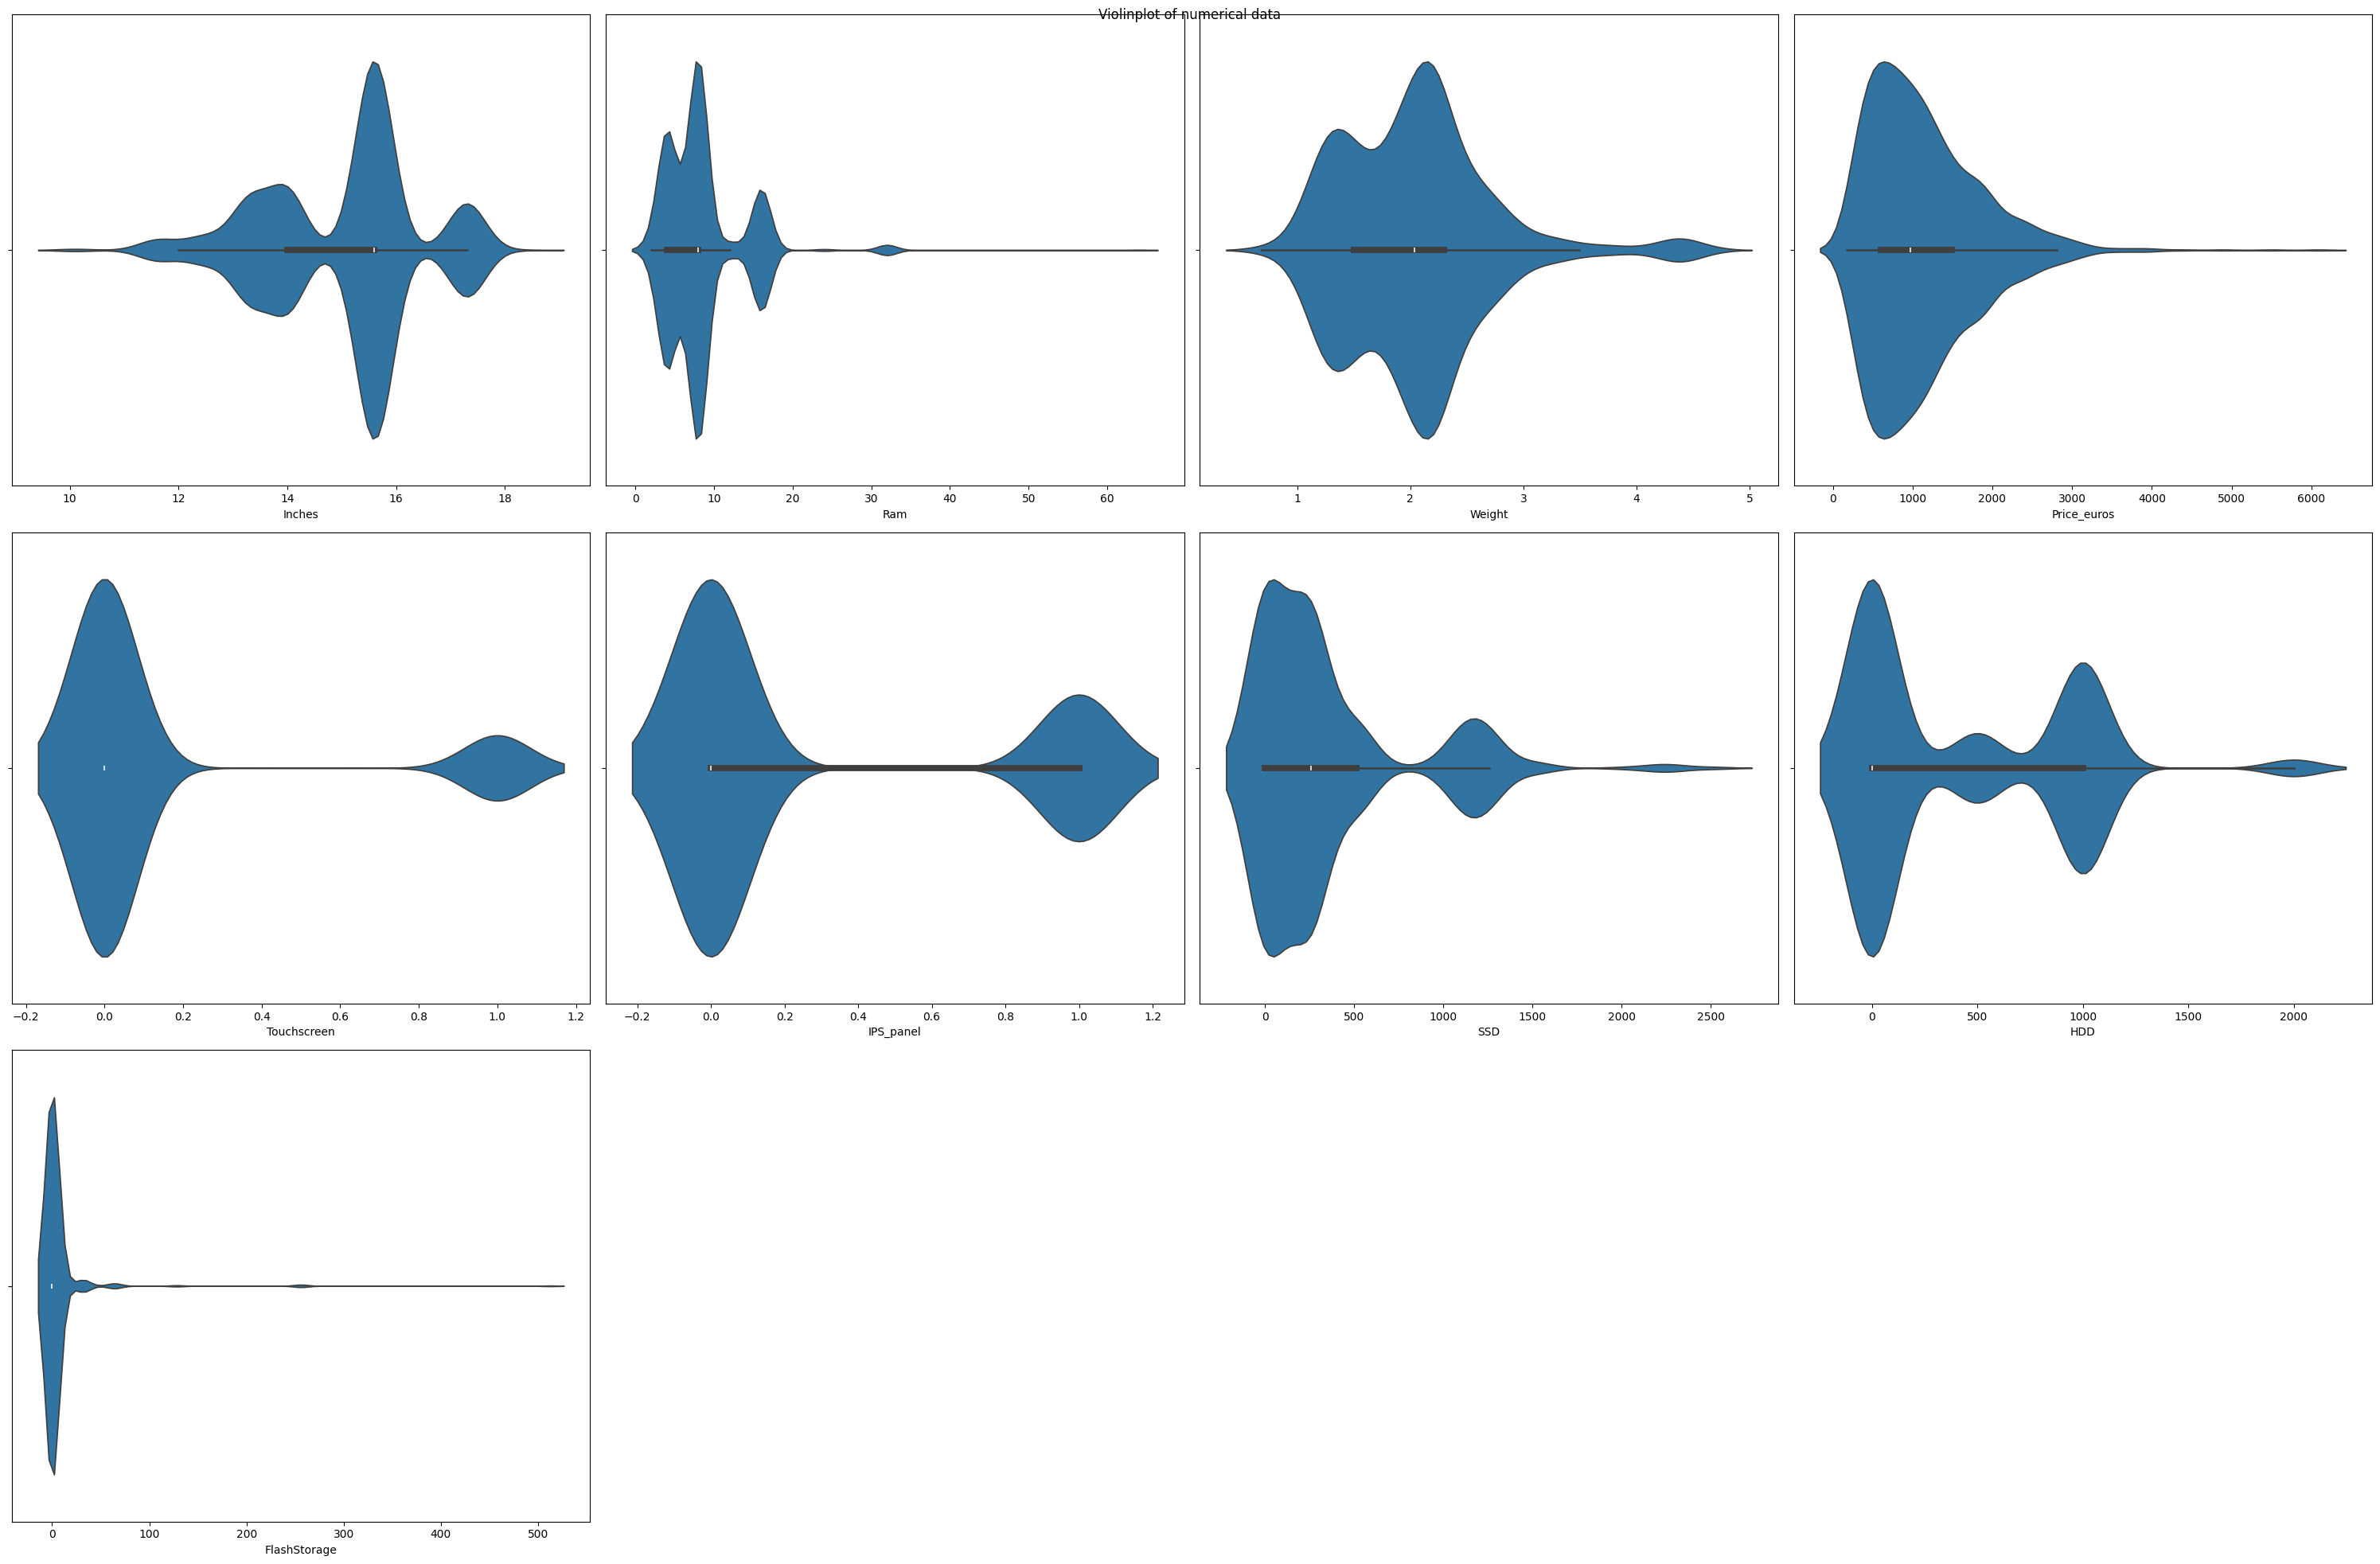

In [63]:
plt.figure(figsize=(30,20))
try:
    plt.suptitle("Violinplot of numerical data")
    for i in range(0,len(numerical_feature)):
        plt.subplot(3,4,i+1)
        sns.violinplot(x=data[numerical_feature[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

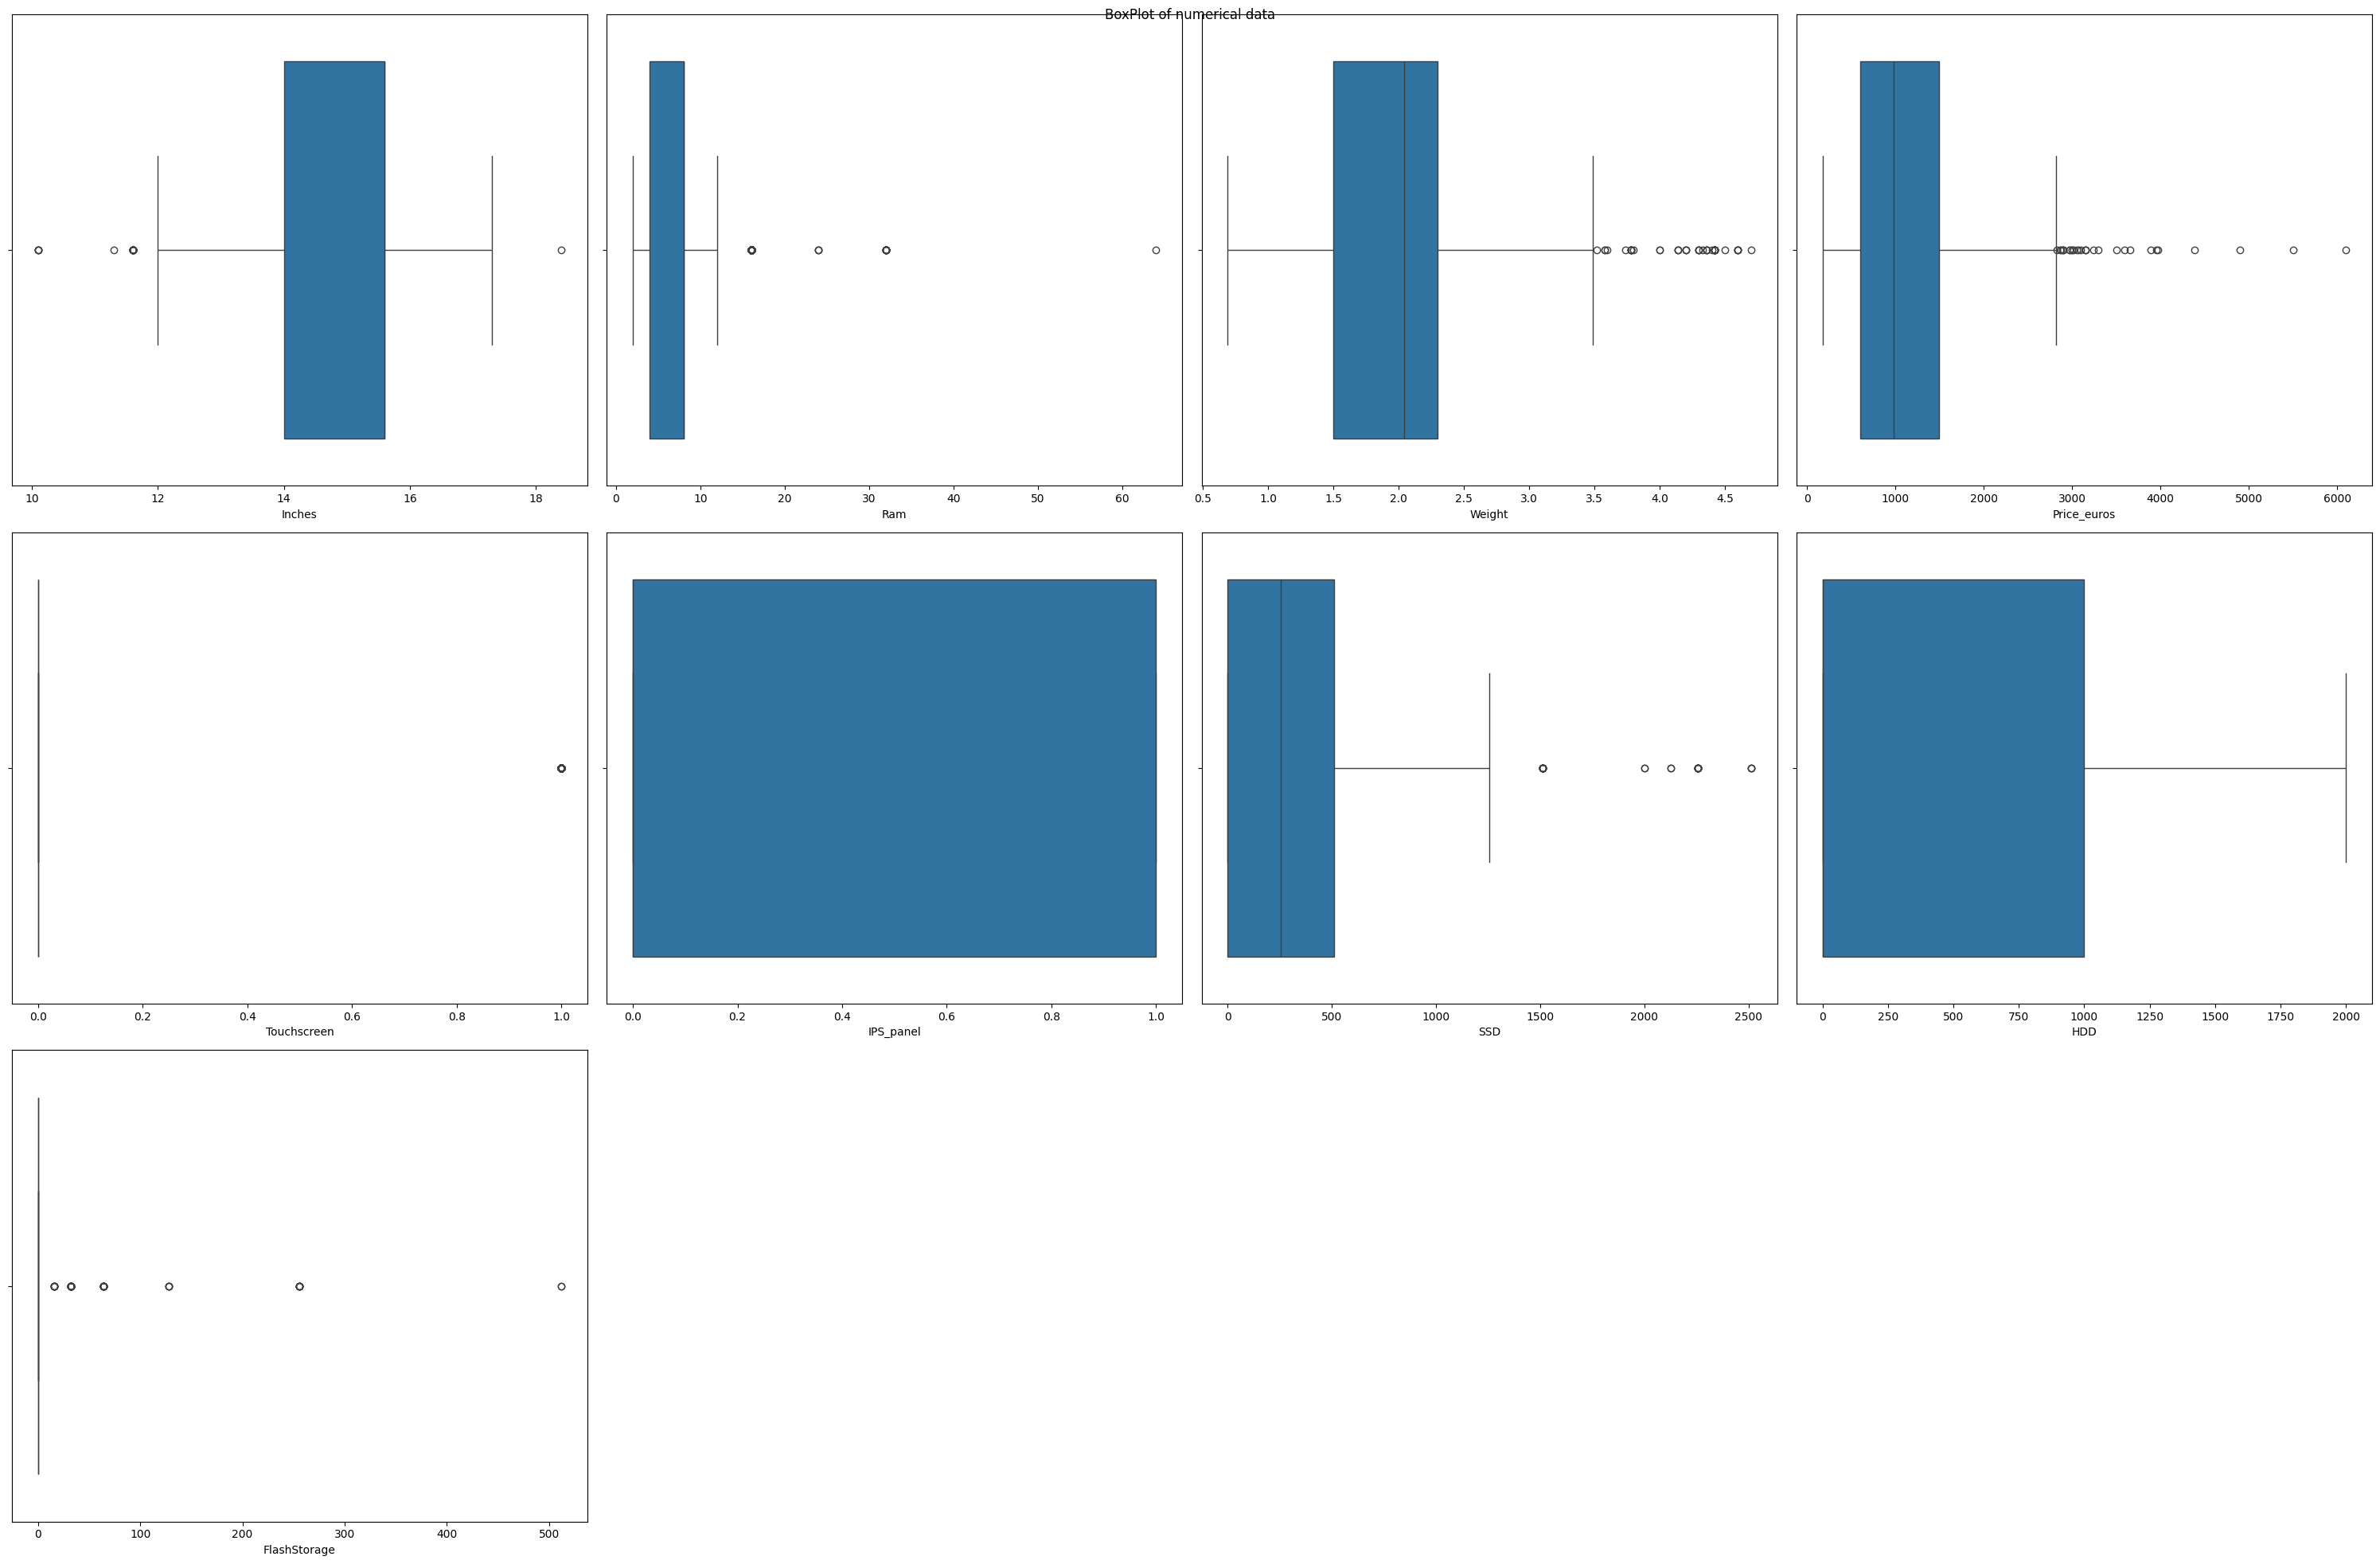

In [64]:
plt.figure(figsize=(30,20))
try:
    plt.suptitle("BoxPlot of numerical data")
    for i in range(0,len(numerical_feature)):
        plt.subplot(3,4,i+1)
        sns.boxplot(x=data[numerical_feature[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

In [65]:
data['Price'] = data['Price_euros']*90 
data.head()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price_euros,Touchscreen,IPS_panel,X_resolution,Y_resolution,Cpu_brand,SSD,HDD,FlashStorage,Gpu_brand,Price
0,Apple,Ultrabook,13.3,2560x1600,8,Mac,1.37,1339.69,0,1,2560,1600,Intel Core i5,128,0,0,Intel,120572.1
1,Apple,Ultrabook,13.3,1440x900,8,Mac,1.34,898.94,0,0,1440,900,Intel Core i5,0,0,128,Intel,80904.6
2,HP,Notebook,15.6,1920x1080,8,No,1.86,575.00,0,0,1920,1080,Intel Core i5,256,0,0,Intel,51750.0
3,Apple,Ultrabook,15.4,2880x1800,16,Mac,1.83,2537.45,0,1,2880,1800,Intel Core i7,512,0,0,AMD,228370.5
4,Apple,Ultrabook,13.3,2560x1600,8,Mac,1.37,1803.60,0,1,2560,1600,Intel Core i5,256,0,0,Intel,162324.0


In [66]:
data.drop(columns=['X_resolution' ,'Y_resolution' ] ,inplace=True)

In [67]:
data.drop(columns=['Price_euros' ] ,inplace=True)

In [68]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Touchscreen,IPS_panel,Cpu_brand,SSD,HDD,FlashStorage,Gpu_brand,Price
0,Apple,Ultrabook,13.3,2560x1600,8,Mac,1.37,0,1,Intel Core i5,128,0,0,Intel,120572.1
1,Apple,Ultrabook,13.3,1440x900,8,Mac,1.34,0,0,Intel Core i5,0,0,128,Intel,80904.6
2,HP,Notebook,15.6,1920x1080,8,No,1.86,0,0,Intel Core i5,256,0,0,Intel,51750.0
3,Apple,Ultrabook,15.4,2880x1800,16,Mac,1.83,0,1,Intel Core i7,512,0,0,AMD,228370.5
4,Apple,Ultrabook,13.3,2560x1600,8,Mac,1.37,0,1,Intel Core i5,256,0,0,Intel,162324.0


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Ram               1303 non-null   int32  
 5   OpSys             1303 non-null   object 
 6   Weight            1303 non-null   float64
 7   Touchscreen       1303 non-null   int64  
 8   IPS_panel         1303 non-null   int64  
 9   Cpu_brand         1303 non-null   object 
 10  SSD               1303 non-null   int64  
 11  HDD               1303 non-null   int64  
 12  FlashStorage      1303 non-null   int64  
 13  Gpu_brand         1303 non-null   object 
 14  Price             1303 non-null   float64
dtypes: float64(3), int32(1), int64(5), object(6)
memory usage: 147.7+ KB


<Axes: >

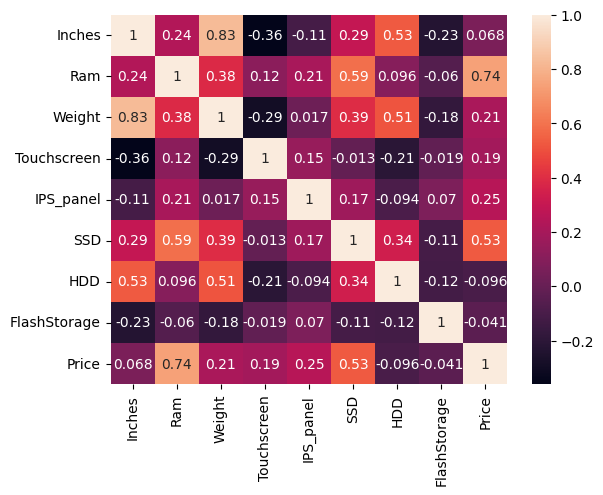

In [77]:
data.corr(numeric_only = True)
sns.heatmap(data.corr(numeric_only = True) ,annot=True)

# Model Training

In [70]:
data

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Touchscreen,IPS_panel,Cpu_brand,SSD,HDD,FlashStorage,Gpu_brand,Price
0,Apple,Ultrabook,13.3,2560x1600,8,Mac,1.37,0,1,Intel Core i5,128,0,0,Intel,120572.1
1,Apple,Ultrabook,13.3,1440x900,8,Mac,1.34,0,0,Intel Core i5,0,0,128,Intel,80904.6
2,HP,Notebook,15.6,1920x1080,8,No,1.86,0,0,Intel Core i5,256,0,0,Intel,51750.0
3,Apple,Ultrabook,15.4,2880x1800,16,Mac,1.83,0,1,Intel Core i7,512,0,0,AMD,228370.5
4,Apple,Ultrabook,13.3,2560x1600,8,Mac,1.37,0,1,Intel Core i5,256,0,0,Intel,162324.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,1920x1080,4,Windows,1.80,1,1,Intel Core i7,128,0,0,Intel,57420.0
1299,Lenovo,2 in 1 Convertible,13.3,3200x1800,16,Windows,1.30,1,1,Intel Core i7,512,0,0,Intel,134910.0
1300,Lenovo,Notebook,14.0,1366x768,2,Windows,1.50,0,0,Other Intel,0,0,64,Intel,20610.0
1301,HP,Notebook,15.6,1366x768,6,Windows,2.19,0,0,Intel Core i7,0,1000,0,AMD,68760.0


In [78]:
X = data.drop(columns=['Price'])
Y = data[['Price']]

In [79]:
X.head()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Touchscreen,IPS_panel,Cpu_brand,SSD,HDD,FlashStorage,Gpu_brand
0,Apple,Ultrabook,13.3,2560x1600,8,Mac,1.37,0,1,Intel Core i5,128,0,0,Intel
1,Apple,Ultrabook,13.3,1440x900,8,Mac,1.34,0,0,Intel Core i5,0,0,128,Intel
2,HP,Notebook,15.6,1920x1080,8,No,1.86,0,0,Intel Core i5,256,0,0,Intel
3,Apple,Ultrabook,15.4,2880x1800,16,Mac,1.83,0,1,Intel Core i7,512,0,0,AMD
4,Apple,Ultrabook,13.3,2560x1600,8,Mac,1.37,0,1,Intel Core i5,256,0,0,Intel


In [80]:

# saprate numerical and catigorical data 
catigorical_features = X.select_dtypes(include="object").columns
numerical_features = X.select_dtypes(exclude ="object").columns
print(catigorical_features)
print(numerical_features)

Index(['Company', 'TypeName', 'ScreenResolution', 'OpSys', 'Cpu_brand',
       'Gpu_brand'],
      dtype='object')
Index(['Inches', 'Ram', 'Weight', 'Touchscreen', 'IPS_panel', 'SSD', 'HDD',
       'FlashStorage'],
      dtype='object')


In [81]:
from  sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [82]:
numerical_features

Index(['Inches', 'Ram', 'Weight', 'Touchscreen', 'IPS_panel', 'SSD', 'HDD',
       'FlashStorage'],
      dtype='object')

In [83]:
numericL_pipeline = Pipeline(
    steps=[
        ('imputer' ,SimpleImputer(strategy='median')),
        ('scalar' ,StandardScaler())
    ]
)

categorical_pipeline = Pipeline(
    steps=[
        ('imputer' ,SimpleImputer(strategy='most_frequent')),
        ('encoder' ,OneHotEncoder(handle_unknown='ignore')),
        ('scalar' ,StandardScaler(with_mean=False))
    ]
)

processor = ColumnTransformer(
    [
        ('num_pipeline' , numericL_pipeline ,numerical_features),
        ('cat_pipeline' ,categorical_pipeline ,catigorical_features)
    ]
)



In [84]:
# split train and test data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=42)


In [85]:
data['ScreenResolution'].nunique()

15

In [86]:
X['Touchscreen'].unique()

array([0, 1], dtype=int64)

In [87]:
X.head(10)

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Touchscreen,IPS_panel,Cpu_brand,SSD,HDD,FlashStorage,Gpu_brand
0,Apple,Ultrabook,13.3,2560x1600,8,Mac,1.37,0,1,Intel Core i5,128,0,0,Intel
1,Apple,Ultrabook,13.3,1440x900,8,Mac,1.34,0,0,Intel Core i5,0,0,128,Intel
2,HP,Notebook,15.6,1920x1080,8,No,1.86,0,0,Intel Core i5,256,0,0,Intel
3,Apple,Ultrabook,15.4,2880x1800,16,Mac,1.83,0,1,Intel Core i7,512,0,0,AMD
4,Apple,Ultrabook,13.3,2560x1600,8,Mac,1.37,0,1,Intel Core i5,256,0,0,Intel
5,Acer,Notebook,15.6,1366x768,4,Windows,2.10,0,0,AMD processor,0,500,0,AMD
6,Apple,Ultrabook,15.4,2880x1800,16,Mac,2.04,0,1,Intel Core i7,0,0,256,Intel
7,Apple,Ultrabook,13.3,1440x900,8,Mac,1.34,0,0,Intel Core i5,0,0,256,Intel
8,Asus,Ultrabook,14.0,1920x1080,16,Windows,1.30,0,0,Intel Core i7,512,0,0,Nvidia
9,Acer,Ultrabook,14.0,1920x1080,8,Windows,1.60,0,1,Intel Core i5,256,0,0,Intel


In [88]:
X_train = processor.fit_transform(X_train)
X_test = processor.transform(X_test)

In [89]:
from scipy.sparse import coo_matrix ,hstack ,vstack
import numpy as np
print(hstack([X_train ,np.array(y_train)]).toarray().shape)

(1042, 64)


In [90]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [91]:
import numpy as np
def model_evalution(test,predict):
    mse = mean_squared_error(test,predict)
    mae = mean_absolute_error(test,predict)
    rmse = np.sqrt(mse)
    r2score = r2_score(test,predict)
    return mse,mae,rmse,r2score

In [92]:
## Without Hyperameters
models = {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lesso":Lasso(),
    "Elastic":ElasticNet(),
    "SVR":SVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "ExtraTreeRegressor":ExtraTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "BaggingRegressor":BaggingRegressor(GradientBoostingRegressor())
    
    
}
model_list = []
r2_list = []
y_predict_list = []
trainig_score = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    score = model.score(X_train,y_train)
    # Make Prediction
    y_predict = model.predict(X_test)
    
    mse,mae,rmse,r2sore = model_evalution(y_test,y_predict)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Traning Performance")
    print("MSE",mse*100)
    print("MAE",mae*100)
    print("RMSE",rmse*100)
    print("R2",r2sore*100)
    print("="*40)
    r2_list.append(r2sore*100)
    y_predict_list.append(y_predict)
    trainig_score.append(score)

LinearRegression
Model Traning Performance
MSE 100079019398.21904
MAE 2163531.5272950674
RMSE 3163526.8198360363
R2 75.67476024358275
Ridge
Model Traning Performance
MSE 100106078142.28633
MAE 2163731.461444014
RMSE 3163954.4583050865
R2 75.6681833362459


c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74422833384.46777, tolerance: 407829559.9831085
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Lesso
Model Traning Performance
MSE 100077285407.65804
MAE 2163426.9183905525
RMSE 3163499.4137451337
R2 75.6751817079055
Elastic
Model Traning Performance
MSE 120914772929.72705
MAE 2309420.92610717
RMSE 3477280.157389207
R2 70.61041505707738
SVR
Model Traning Performance
MSE 423322976195.10913
MAE 4459478.399950608
RMSE 6506327.506321128
R2 -2.893023455517496
DecisionTreeRegressor
Model Traning Performance
MSE 103716402516.23276
MAE 1995756.379310345
RMSE 3220503.105358428
R2 74.79065669257211
ExtraTreeRegressor
Model Traning Performance
MSE 158335704695.7845
MAE 2115124.3103448274
RMSE 3979141.926292457
R2 61.514870930132446


c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor
Model Traning Performance
MSE 82607679842.81508
MAE 1678960.821252053
RMSE 2874155.177488075
R2 79.92134984954107
AdaBoostRegressor
Model Traning Performance
MSE 156637240015.27628
MAE 3202463.2295176014
RMSE 3957742.285890736
R2 61.927700320544155


c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor
Model Traning Performance
MSE 83254314820.99994
MAE 1777562.9478763868
RMSE 2885382.3805693407
R2 79.76417853657442
KNeighborsRegressor
Model Traning Performance
MSE 108433991191.85379
MAE 1979792.8275862068
RMSE 3292931.6906345594
R2 73.64399801928896


c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor
Model Traning Performance
MSE 84761791990.04895
MAE 1797521.300005268
RMSE 2911387.8475745716
R2 79.39777063424944


In [93]:
trainig_score

[0.7909917789055215,
 0.7909908781648092,
 0.790991752619923,
 0.7598502489696523,
 -0.04325883408612108,
 0.9942910676189524,
 0.9942910676189524,
 0.9708018870570588,
 0.6704092999945053,
 0.8888467181833037,
 0.8363272834881115,
 0.879343166061261]

Text(0, 0.5, 'Predictions')

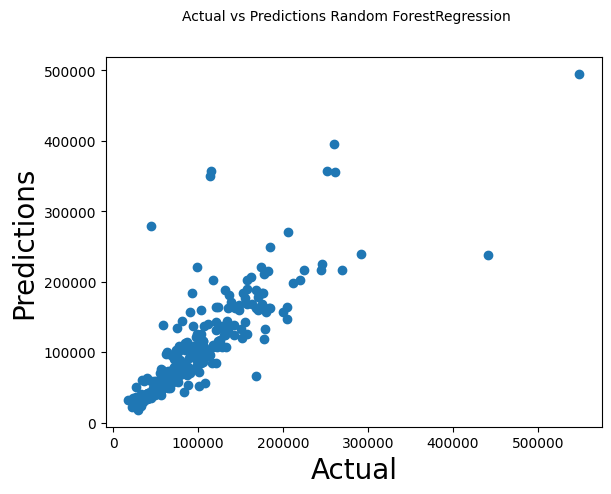

In [94]:

# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter((y_test),(y_predict_list[6]))
fig.suptitle('Actual vs Predictions Random ForestRegression', fontsize=10)              # Plot heading 
plt.xlabel('Actual', fontsize=20)                          # X-label
plt.ylabel('Predictions', fontsize=20)

In [95]:
# model = RandomizedSearchCV(estimator=model , param_distributions=param ,cv=5)
# model.fit()

In [96]:
# Define models and their hyperparameters for GridSearchCV
models = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}
    },
    "Lasso": {
        "model": Lasso(),
        "params": {
            "alpha": [0.01, 0.1, 1, 10,20]
        }
    },
    "Ridge": {
        "model": Ridge(),
        "params": {
            "alpha": [0.01, 0.1, 1, 10,20]
        }
    },
    "Elastic Net": {
        "model": ElasticNet(),
        "params": {
            "alpha": [0.01, 0.1, 1, 10],
            "l1_ratio": [0.2, 0.4, 0.6, 0.8]
        }
    },
    "Decision Tree Regressor": {
        "model": DecisionTreeRegressor(),
        "params": {
            "criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
            "splitter":['best','random'],
            "max_depth": [3, 5, 7, 9, 11],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "max_features":["auto","sqrt","log2"]
        }
    },
    "RandomForestRegressor":{
        "model":RandomForestRegressor(random_state=3),
        "params":{
            "criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
            'n_estimators': [100,150,300],
            'max_depth': [8,10,15,20],
            'min_samples_split': [0.5,4, 5],
            'min_samples_leaf': [3, 5, 6],
        }
    },
    "ExtraTreeRegressor": {
        "model": ExtraTreeRegressor(),
        "params": {
            "criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
            "splitter":['best','random'],
            "max_depth": [8,12,13,20,25],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "max_features":["auto","sqrt","log2"],
        }
    },
    "SVR": {
        "model": SVR(kernel='rbf'),
        "params": {
            "gamma":["scale", "auto"],
            "C": [0.01, 0.1, 1, 10],
        }
    },
    "AdaBoostRegressor": {
        "model": AdaBoostRegressor(),
        "params": {
            'n_estimators': [ 180, 200,300],
            "learning_rate":[0.1,0.001,0.01,1,0.00001],
            "loss":["linear", "square", "exponential"]
        }
    },
    "GradientBoostingRegressor": {
        "model": GradientBoostingRegressor(),
        "params": {
            'n_estimators': [ 180, 200,300,400],
            "learning_rate":[0.1,0.001,0.01,1,0.00001],
            "loss":["squared_error", "absolute_error", "huber", "quantile"],
            "max_depth": [8,10,15,20,30],
            "min_samples_split": [8,10,6,20,25],
            "min_samples_leaf": [5,6,8,10,15,20],
            "max_features":["auto","sqrt","log2"],
        }
    },
    "KNeighborsRegressor": {
        "model": KNeighborsRegressor(),
        "params": {
            "n_neighbors":[8,10,15,18],
            "algorithm":["auto", "ball_tree", "kd_tree", "brute"],
            "leaf_size":[35,40,45,50],  
        },
    "BaggingRegressor": {
        "model": BaggingRegressor(GradientBoostingRegressor()),
        "params": {
        }
    }
}
}
model_list = []
r2_list = []
y_predict_list = []
trainig_score = []

# Train and evaluate models using GridSearchCV
for model_name, model_params in models.items():
    model = model_params["model"]
    params = model_params["params"]
    randomcv = RandomizedSearchCV(model, params, cv=5)
    randomcv.fit(X_train, y_train)
    score = randomcv.score(X_train, y_train)
    y_pred = randomcv.predict(X_test)
    print(f"Model: {model_name}")
    print(f"Best Parameters: {randomcv.best_params_}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"R-squared: {r2_score(y_test, y_pred)}\n")
    r2_list.append(r2_score)
    y_predict_list.append(y_pred)
    trainig_score.append(score)
    

c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31855597414.735046, tolerance: 314718706.5035845
  model = cd_fast.sparse_enet_coordinate_descent(


Model: Linear Regression
Best Parameters: {}
MAE: 21635.315272950676
RMSE: 31635.26819836036
R-squared: 0.7567476024358275



c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70163710072.56769, tolerance: 337338863.045712
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66747329140.19403, tolerance: 334580893.5040183
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48057608073.97955, tolerance: 313155990.705642
  model = cd_fast.spars

Model: Lasso
Best Parameters: {'alpha': 20}
MAE: 21607.571486422887
RMSE: 31627.80846562401
R-squared: 0.7568623088398905

Model: Ridge
Best Parameters: {'alpha': 20}
MAE: 21652.641279008334
RMSE: 31715.010159464397
R-squared: 0.7555197405241911



c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110986529821.06793, tolerance: 314718706.5035845
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 984239999.3327637, tolerance: 337338863.045712
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\PRAMOD KHAVARE\AppData\Local\

Model: Elastic Net
Best Parameters: {'l1_ratio': 0.2, 'alpha': 0.1}
MAE: 21762.47351253291
RMSE: 32074.94482824683
R-squared: 0.7499390227053597

Model: Decision Tree Regressor
Best Parameters: {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 11, 'criterion': 'poisson'}
MAE: 28028.715967253993
RMSE: 53493.20140701446
R-squared: 0.3044773654515941



c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python3

Model: RandomForestRegressor
Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_depth': 20, 'criterion': 'friedman_mse'}
MAE: 18039.899109169204
RMSE: 30455.010942412933
R-squared: 0.7745596718734367

Model: ExtraTreeRegressor
Best Parameters: {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 25, 'criterion': 'squared_error'}
MAE: 26225.868246837887
RMSE: 49577.13840477369
R-squared: 0.40258379403767075



c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python3

Model: SVR
Best Parameters: {'gamma': 'scale', 'C': 10}
MAE: 44385.82393141536
RMSE: 64876.49452263732
R-squared: -0.02303110670749997



c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\skl

Model: AdaBoostRegressor
Best Parameters: {'n_estimators': 180, 'loss': 'exponential', 'learning_rate': 0.01}
MAE: 25563.154608227753
RMSE: 37160.42864766094
R-squared: 0.6643586045377495



c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c

Model: GradientBoostingRegressor
Best Parameters: {'n_estimators': 400, 'min_samples_split': 20, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 20, 'loss': 'squared_error', 'learning_rate': 0.1}
MAE: 16276.19869266849
RMSE: 28159.127928767222
R-squared: 0.8072685939325085



c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_base.py:584: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_base.py:584: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_base.py:584: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_base.py:584: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute 

Model: KNeighborsRegressor
Best Parameters: {'n_neighbors': 8, 'leaf_size': 50, 'algorithm': 'kd_tree'}
MAE: 20578.126724137932
RMSE: 34308.68539265073
R-squared: 0.7138971110794352



c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_base.py:584: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_base.py:584: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_base.py:584: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_base.py:584: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute 

c:\Users\PRAMOD KHAVARE\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)
C:\Users\PRAMOD KHAVARE\AppData\Local\Temp\ipykernel_25796\1219598459.py:3: RuntimeWarning: overflow encountered in exp
  plt.scatter(np.exp(y_test),np.exp(y_predict_list[-2]))


Text(0, 0.5, 'Predictions')

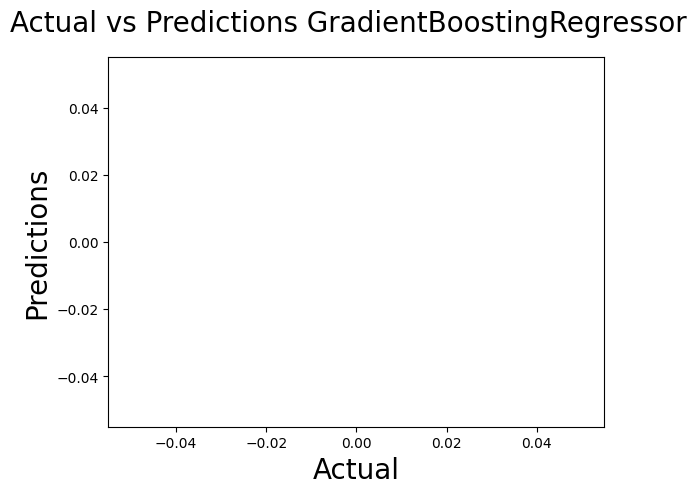

In [97]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(np.exp(y_test),np.exp(y_predict_list[-2]))
fig.suptitle('Actual vs Predictions GradientBoostingRegressor', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=20)                          # X-label
plt.ylabel('Predictions', fontsize=20)

In [105]:
data.to_csv("D:\\MachineLearning\\Project\\LaptopPricePrediction\\notebook\\data\\clean_laptop.csv",index=False)

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS_panel,Cpu_brand,SSD,HDD,FlashStorage,PPI,Gpu_brand,Price
0,Apple,Ultrabook,8,Mac,1.37,0,1,Intel Core i5,128,0,0,226.983005,Intel,120572.1
1,Apple,Ultrabook,8,Mac,1.34,0,0,Intel Core i5,0,0,128,127.677940,Intel,80904.6
2,HP,Notebook,8,No,1.86,0,0,Intel Core i5,256,0,0,141.211998,Intel,51750.0
3,Apple,Ultrabook,16,Mac,1.83,0,1,Intel Core i7,512,0,0,220.534624,AMD,228370.5
4,Apple,Ultrabook,8,Mac,1.37,0,1,Intel Core i5,256,0,0,226.983005,Intel,162324.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,1,1,Intel Core i7,128,0,0,157.350512,Intel,57420.0
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,1,1,Intel Core i7,512,0,0,276.053530,Intel,134910.0
1300,Lenovo,Notebook,2,Windows,1.50,0,0,Other Intel,0,0,64,111.935204,Intel,20610.0
1301,HP,Notebook,6,Windows,2.19,0,0,Intel Core i7,0,1000,0,100.454670,AMD,68760.0


In [102]:
import pandas as pd 
data = pd.read_csv('D:\\MachineLearning\\Project\\LaptopPricePrediction\\notebook\\data\\clean_laptop.csv')

In [103]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Touchscreen,IPS_panel,Cpu_brand,SSD,HDD,FlashStorage,Gpu_brand,Price
0,Apple,Ultrabook,13.3,2560x1600,8,Mac,1.37,0,1,Intel Core i5,128,0,0,Intel,120572.1
1,Apple,Ultrabook,13.3,1440x900,8,Mac,1.34,0,0,Intel Core i5,0,0,128,Intel,80904.6
2,HP,Notebook,15.6,1920x1080,8,No,1.86,0,0,Intel Core i5,256,0,0,Intel,51750.0
3,Apple,Ultrabook,15.4,2880x1800,16,Mac,1.83,0,1,Intel Core i7,512,0,0,AMD,228370.5
4,Apple,Ultrabook,13.3,2560x1600,8,Mac,1.37,0,1,Intel Core i5,256,0,0,Intel,162324.0


In [104]:
data['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)